In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

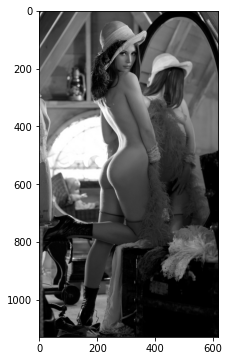

In [ ]:
img=Image.open('/content/lenna-so0308derberg-1972_620.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);


## Create numpy matrix

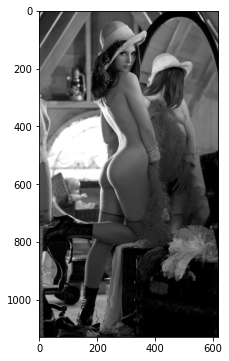

In [ ]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

# SVD

In [ ]:
U, sigma, V = np.linalg.svd(imgmat)

In [ ]:
for i in range(1, 202, 25):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.figure(figsize=(18, 12))
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Sklearn PCA SVD

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
for i in range(1,202,25):
  pca = PCA(n_components = i)
  XPCAreduced = pca.fit_transform(imgmat)
  proj = pca.inverse_transform(XPCAreduced)
  print(XPCAreduced.shape)
  plt.figure(figsize=(18, 12))
  plt.imshow(proj, cmap='gray');
  plt.title("n = %s" % i)
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Covariation matrix PCA

In [ ]:
import scipy

covmat = np.cov(imgmat)
val, vecs = scipy.linalg.schur(covmat)

for n in range(1,202,25):
  v = vecs[:,:n]
  Xnew = np.dot(imgmat.T, v)

  Xrestored = np.dot(v, Xnew.T).astype(float)

  plt.figure(figsize=(18, 12))
  plt.imshow(Xrestored, cmap='gray')
  plt.title(n)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.


Random SVD или Random Projection